In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import pickle


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from src.models import gan#, aae  # , vae
 
from src.common.helperfunctions import *
from src.common.accuracy_XGboost import *


import xgboost as xgb
import time
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_name = 'data/raw/creditcard.csv'
df = pd.read_csv(file_name)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
label_col = []
feature_cols = []
label_col = [i for i in df.columns if 'Class' in i]
feature_cols = [i for i in df.columns if i not in label_col]

In [5]:
X = df.loc[:,feature_cols]
y = df.loc[:,label_col]

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
train = pd.concat([train_X, train_y], axis=1)

In [8]:
train_Class = train[train.Class == 1]

In [9]:
sc = StandardScaler()
train.loc[:,'Amount'] = sc.fit_transform(train.Amount.values.reshape(-1, 1))
test_X.loc[:,'Amount'] = sc.transform(test_X.Amount.values.reshape(-1, 1))
train.drop('Time',axis=1, inplace=True)
test_X.drop('Time', axis=1, inplace=True)

/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
label_col = []
feature_cols = []
label_col = [i for i in train.columns if 'Class' in i]
feature_cols = [i for i in train.columns if i not in label_col]

# Train GAN

In [11]:
train_Class.drop('Class', axis = 1,inplace=True)
train_Class.drop('Time', axis = 1,inplace=True)

In [12]:
train_Class.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [13]:
df = prepareDataset(train_Class, batch_size = 64, device = 'cpu', label = 'no')

In [14]:
df.dataset.features.size(1)

29

In [15]:
xgblosses, G_losses, D_losses = gan.train(df, randomNoise_dim = 29, hidden_dim = 64, realData_dim =df.dataset.features.size(1), lr = 0.002, num_epochs=1500, device='cpu')

Starting Training Loop...
epoch: 0, Accuracy: 0.8121827411167513
[0/1501][6/7]	Loss_D: 0.8899	Loss_G: 0.7017	
epoch: 10, Accuracy: 0.9974619289340102
[10/1501][6/7]	Loss_D: 0.0967	Loss_G: 4.3934	
epoch: 20, Accuracy: 0.8401015228426396
[20/1501][6/7]	Loss_D: 0.5187	Loss_G: 2.3662	
epoch: 30, Accuracy: 0.850253807106599
[30/1501][6/7]	Loss_D: 0.7482	Loss_G: 1.9428	
epoch: 40, Accuracy: 0.9923857868020305
[40/1501][6/7]	Loss_D: 0.9278	Loss_G: 1.0512	
epoch: 50, Accuracy: 0.9796954314720813
[50/1501][6/7]	Loss_D: 1.1537	Loss_G: 1.1224	
epoch: 60, Accuracy: 0.9441624365482234
[60/1501][6/7]	Loss_D: 1.3197	Loss_G: 1.6720	
epoch: 70, Accuracy: 0.8578680203045685
[70/1501][6/7]	Loss_D: 0.9939	Loss_G: 0.9861	
epoch: 80, Accuracy: 0.9720812182741116
[80/1501][6/7]	Loss_D: 1.0616	Loss_G: 1.0606	
epoch: 90, Accuracy: 0.8096446700507615
[90/1501][6/7]	Loss_D: 1.1781	Loss_G: 0.9761	
epoch: 100, Accuracy: 0.9796954314720813
[100/1501][6/7]	Loss_D: 1.0525	Loss_G: 1.3576	
epoch: 110, Accuracy: 0.96700

In [16]:
xgblosses

array([0.81218274, 0.99746193, 0.84010152, 0.85025381, 0.99238579,
       0.97969543, 0.94416244, 0.85786802, 0.97208122, 0.80964467,
       0.97969543, 0.96700508, 0.92893401, 0.88324873, 0.96192893,
       0.94162437, 0.94923858, 0.87055838, 0.7715736 , 0.89593909,
       0.95177665, 0.88324873, 0.9822335 , 0.95177665, 0.96192893,
       0.93401015, 0.86548223, 0.92385787, 0.95685279, 0.89340102,
       0.80456853, 0.89340102, 0.84263959, 0.88832487, 0.92893401,
       0.91370558, 0.93654822, 0.93401015, 0.92385787, 0.74365482,
       0.90101523, 0.88832487, 0.87055838, 0.93147208, 0.92385787,
       0.89340102, 0.87309645, 0.87817259, 0.9213198 , 0.8680203 ,
       0.9213198 , 0.81218274, 0.84517766, 0.94670051, 0.80456853,
       0.87309645, 0.93401015, 0.85025381, 0.8248731 , 0.88071066,
       0.75888325, 0.87563452, 0.9213198 , 0.8680203 , 0.80203046,
       0.86040609, 0.84517766, 0.82994924, 0.81979695, 0.83756345,
       0.8857868 , 0.87563452, 0.68020305, 0.74619289, 0.84263

In [19]:
number = 0.68020305

In [20]:
for i in range(xgblosses.size):
    if np.round(xgblosses[i],8) == number:
        print(i*10)

720


0.6802030456852792


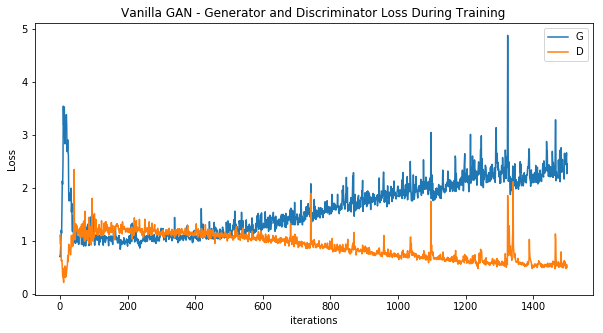

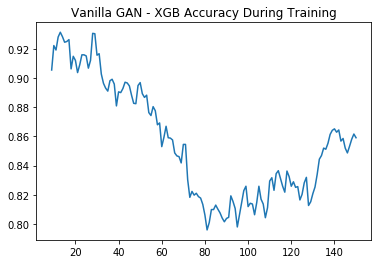

In [18]:
print(min(xgblosses))
plt.figure(figsize=(10,5))
plt.title(f"Vanilla GAN - Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f'reports/figures/gan/GAN.png')
plt.show()

w = 10
a = pd.DataFrame(xgblosses[:]).rolling(w).mean()
plt.title(f"Vanilla GAN - XGB Accuracy During Training")
plt.plot(a)
plt.savefig(f'reports/figures/gan/xgblosses_GAN.png')
plt.show()

In [21]:
amount=train_X.shape[0]
device='cpu'

In [22]:
randomNoise_dim = 29; hidden_dim = 64; realData_dim =df.dataset.features.size(1)

In [23]:
more_data = gan.generate_data(720, randomNoise_dim, hidden_dim, realData_dim, amount, 'cpu')

In [24]:
more_data = more_data.detach().numpy()

In [25]:
b = np.ones((more_data.shape[0],more_data.shape[1]+1))
b[:,:-1] = more_data

In [26]:
b

array([[-3.74648833e+00,  1.67158341e+00, -3.32639575e+00, ...,
        -1.74524382e-01,  8.49631271e+01,  1.00000000e+00],
       [-5.65757990e+00,  4.23543978e+00, -9.08534813e+00, ...,
        -8.24903190e-01,  4.51143280e+02,  1.00000000e+00],
       [-4.19404316e+00,  3.48470283e+00, -6.79983711e+00, ...,
         4.14556623e-01,  7.45879769e-01,  1.00000000e+00],
       ...,
       [-2.80120587e+00,  3.59284377e+00, -4.07865429e+00, ...,
        -5.41586220e-01,  4.42966156e+02,  1.00000000e+00],
       [-2.23116159e+00,  2.35997701e+00, -3.54712534e+00, ...,
        -1.88884273e-01,  2.06392456e+02,  1.00000000e+00],
       [-1.16502943e+01,  6.12453222e+00, -1.40727768e+01, ...,
        -3.23651254e-01,  2.28655930e+01,  1.00000000e+00]])

In [27]:
df_generatedData = pd.DataFrame(b, columns = feature_cols + label_col)
df_generatedData.head()

V1        V2         V3        V4         V5        V6         V7  \
0  -3.746488  1.671583  -3.326396  1.300700  -2.239374 -0.522375  -3.305003   
1  -5.657580  4.235440  -9.085348  5.152085  -8.096600  0.611667  -6.766641   
2  -4.194043  3.484703  -6.799837  3.915308  -4.308702 -1.649575  -8.820753   
3  -3.151664  1.525101  -0.984689  4.935404   1.641620 -0.441148  -2.102955   
4 -10.795351  6.751608 -19.413870  9.554858 -10.647628 -3.282837 -19.627871   

         V8        V9        V10  ...       V21       V22       V23       V24  \
0  0.872262 -1.570905  -4.529001  ...  0.304583  0.651947 -0.166428 -0.070164   
1  2.330878 -2.725926  -8.237358  ...  0.732509  1.698818 -0.145588 -0.266639   
2  2.549461 -3.406720 -10.455271  ...  1.517537  0.258504  0.178004 -0.457906   
3  0.356041 -3.197555  -2.311007  ...  0.263501 -0.790250 -0.732062 -0.251963   
4  6.974954 -4.369109 -17.993092  ...  1.930022  0.669329  0.010475 -0.500988   

        V25       V26       V27       V28      Amount  Class  
0  0.435700  0.085980  0.232742 -0.174524   84.963127    1.0  
1  0.767018  0.817795  1.105154 -0.824903  451.143280    1.0  
2 -0.229811  0.010223  1.706122  0.414557    0.745880    1.0  
3 -0.372670  0.546962  0.730577  0.019122    2.063379    1.0  
4 -0.570860  0.324086  0.301991  0.039855    5.600980    1.0  

[5 rows x 30 columns]

In [28]:
train.shape

(227845, 30)

In [29]:
train = train.append(df_generatedData)

In [30]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [31]:
train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
train_y = train.Class

In [33]:
train_y.isnull().sum()

0

In [34]:
train_X = train.drop('Class', axis=1, inplace=True)

# XGBoost

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
start_time = time.time()
dtrain = xgb.DMatrix(train_X, train_y, feature_names=feature_cols)
dtest = xgb.DMatrix(test_X, test_y, feature_names=feature_cols)

results_dict = {}

param = {
        'max_depth':5, 
        'eta':0.3, 
        'verbosity': 1, 
        'objective':'binary:logistic', 
        'eval_metric': 'auc', 
        'seed': 42
        }

model = xgb.train(param, dtrain, num_boost_round=20)
# make prediction
preds = model.predict(dtest)
elapsed_time = time.time() - start_time
print('Time elapsed to train: ', elapsed_time)

In [ ]:
preds = preds.round()

In [ ]:
print('---' * 45)
print('XGBoost ROC/AUC: {:.6f}'.format(roc_auc_score(test_y, preds)))
print('Recall Score: {:.6f}'.format(recall_score(test_y, preds)))
print('Precision Score: {:.6f}'.format(precision_score(test_y, preds)))
print('F1 Score: {:.6f}'.format(f1_score(test_y, preds)))
print('Accuracy Score: {:.6f}'.format(accuracy_score(test_y, preds)))
print('---' * 45)